# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate Cities List

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")



Processing Record 1 of Set 1 : khandbari
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : yellowknife
Processing Record 4 of Set 1 : georgetown
Processing Record 5 of Set 1 : nanortalik
Processing Record 6 of Set 1 : ushuaia
Processing Record 7 of Set 1 : new norfolk
City not found. Skipping...
Processing Record 8 of Set 1 : ostrovnoy
Processing Record 9 of Set 1 : bethel
Processing Record 10 of Set 1 : hobart
Processing Record 11 of Set 1 : kapaa
Processing Record 12 of Set 1 : amga
Processing Record 13 of Set 1 : port alfred
Processing Record 14 of Set 1 : birao
Processing Record 15 of Set 1 : lorengau
Processing Record 16 of Set 1 : butaritari
City not found. Skipping...
Processing Record 17 of Set 1 : khatanga
Processing Record 18 of Set 1 : vaini
Processing Record 19 of Set 1 : hilo
Processing Record 20 of Set 1 : mahendranagar
Processing Record 21 of Set 1 : berlevag
Processing Record 22 of Set 1 : cape town
Processing Record 23 of Set 1 : faanui
Processing R

Processing Record 36 of Set 4 : chumikan
Processing Record 37 of Set 4 : luderitz
City not found. Skipping...
Processing Record 38 of Set 4 : alyangula
Processing Record 39 of Set 4 : talnakh
Processing Record 40 of Set 4 : kieta
Processing Record 41 of Set 4 : sisimiut
Processing Record 42 of Set 4 : iskateley
Processing Record 43 of Set 4 : conde
Processing Record 44 of Set 4 : cooma
Processing Record 45 of Set 4 : lukovetskiy
Processing Record 46 of Set 4 : esfahan
Processing Record 47 of Set 4 : vung tau
Processing Record 48 of Set 4 : qasigiannguit
Processing Record 49 of Set 4 : guanica
Processing Record 50 of Set 4 : itarema
Processing Record 0 of Set 5 : bengkulu
Processing Record 1 of Set 5 : chute-aux-outardes
Processing Record 2 of Set 5 : nelson bay
Processing Record 3 of Set 5 : la plata
Processing Record 4 of Set 5 : mar del plata
Processing Record 5 of Set 5 : narsaq
Processing Record 6 of Set 5 : harnosand
Processing Record 7 of Set 5 : qaanaaq
Processing Record 8 of Se

Processing Record 24 of Set 8 : sao miguel do araguaia
Processing Record 25 of Set 8 : caluire-et-cuire
Processing Record 26 of Set 8 : port said
Processing Record 27 of Set 8 : naantali
Processing Record 28 of Set 8 : bilibino
Processing Record 29 of Set 8 : caraballeda
Processing Record 30 of Set 8 : praia
City not found. Skipping...
Processing Record 31 of Set 8 : ankazoabo
Processing Record 32 of Set 8 : chabahar
Processing Record 33 of Set 8 : doume
City not found. Skipping...
Processing Record 34 of Set 8 : ajdabiya
Processing Record 35 of Set 8 : port pirie
Processing Record 36 of Set 8 : mehamn
Processing Record 37 of Set 8 : gisborne
Processing Record 38 of Set 8 : tamale
Processing Record 39 of Set 8 : prince rupert
Processing Record 40 of Set 8 : purpe
Processing Record 41 of Set 8 : kawalu
Processing Record 42 of Set 8 : kamenka
Processing Record 43 of Set 8 : baruun-urt
Processing Record 44 of Set 8 : damavand
Processing Record 45 of Set 8 : olafsvik
Processing Record 46 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [6]:
# Count data
weather_df.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [7]:
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khanbari,99,NP,1619928008,47,27.3747,87.2039,75.61,5.39
1,Rikitea,96,PF,1619928012,77,-23.1203,-134.9692,76.77,12.82
2,Yellowknife,1,CA,1619927782,55,62.4560,-114.3525,30.20,6.91
3,George Town,20,MY,1619927981,79,5.4112,100.3354,89.60,8.05
4,Nanortalik,85,GL,1619928014,67,60.1432,-45.2371,35.01,14.65
...,...,...,...,...,...,...,...,...,...
538,Ilulissat,75,GL,1619928219,48,69.2167,-51.1000,41.00,17.27
539,Kyzyl-Suu,99,KG,1619928251,70,42.3414,78.0056,54.16,3.80
540,Soyo,100,AO,1619928252,85,-6.1349,12.3689,77.22,5.99
541,Rio Tinto,0,PT,1619928252,87,41.1826,-8.5581,46.00,3.44


In [8]:
weather_df.to_csv("output_data/cities.csv", index=False)

In [9]:
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khanbari,99,NP,1619928008,47,27.3747,87.2039,75.61,5.39
1,Rikitea,96,PF,1619928012,77,-23.1203,-134.9692,76.77,12.82
2,Yellowknife,1,CA,1619927782,55,62.4560,-114.3525,30.20,6.91
3,George Town,20,MY,1619927981,79,5.4112,100.3354,89.60,8.05
4,Nanortalik,85,GL,1619928014,67,60.1432,-45.2371,35.01,14.65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    543.000000
mean      69.569061
std       21.352651
min        5.000000
25%       58.000000
50%       73.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [11]:
#  Get the indices of cities that have humidity over 100%.
#there are no values greater than 100% in our data

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df

In [13]:

clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khanbari,99,NP,1619928008,47,27.3747,87.2039,75.61,5.39
1,Rikitea,96,PF,1619928012,77,-23.1203,-134.9692,76.77,12.82
2,Yellowknife,1,CA,1619927782,55,62.4560,-114.3525,30.20,6.91
3,George Town,20,MY,1619927981,79,5.4112,100.3354,89.60,8.05
4,Nanortalik,85,GL,1619928014,67,60.1432,-45.2371,35.01,14.65
...,...,...,...,...,...,...,...,...,...
538,Ilulissat,75,GL,1619928219,48,69.2167,-51.1000,41.00,17.27
539,Kyzyl-Suu,99,KG,1619928251,70,42.3414,78.0056,54.16,3.80
540,Soyo,100,AO,1619928252,85,-6.1349,12.3689,77.22,5.99
541,Rio Tinto,0,PT,1619928252,87,41.1826,-8.5581,46.00,3.44


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

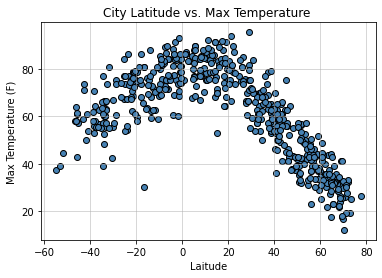

In [14]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature ")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

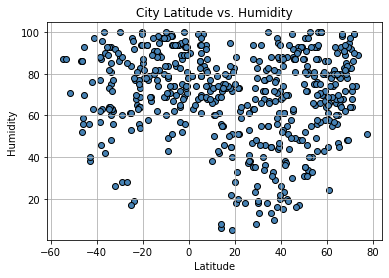

In [15]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

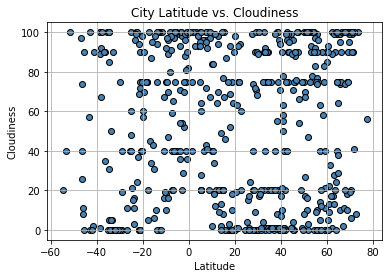

In [16]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

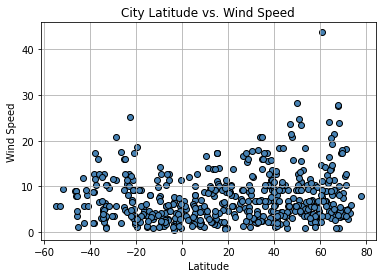

In [17]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [18]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]>0]
Southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9150245836401606


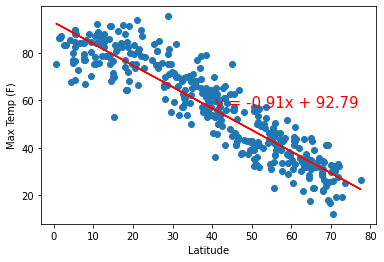

None


In [20]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6699497383561406


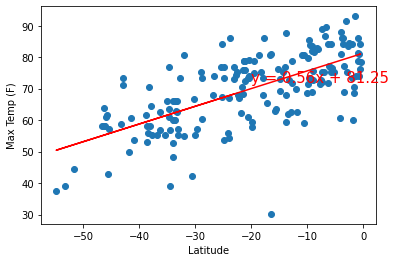

None


In [21]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1402481098531689


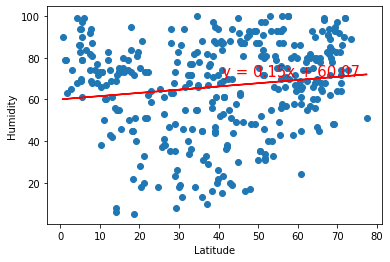

None


In [22]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1995695787303592


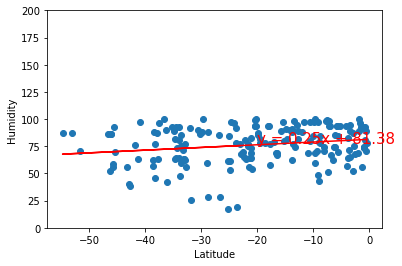

None


In [23]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08710788204845013


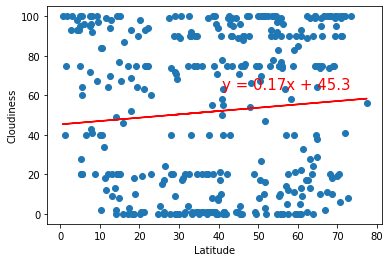

None


In [24]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2713159989535904


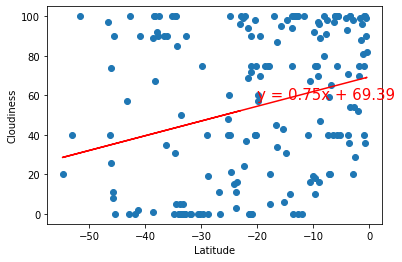

None


In [25]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14969881936854612


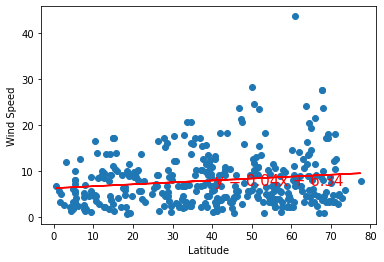

None


In [26]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24718577243775716


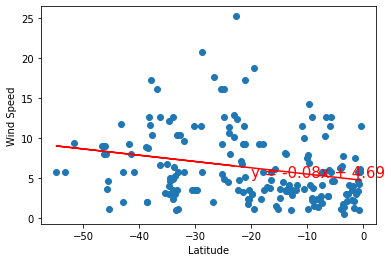

None


In [27]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))